# House Prices Prediction

In [99]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2

In [1]:
# setup 

PATH_FILE_TRAIN = './dataset/train.csv'
PATH_FILE_TEST = './dataset/test.csv'

In [15]:
# read file train 

df = pd.read_csv(PATH_FILE_TRAIN)
df = df.drop(columns=['Id'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
# numerical features
num_cols = df.select_dtypes(include='number').columns
print("Original numerical cols:", len(num_cols))

selector = VarianceThreshold(threshold=0)
selector.fit(df[num_cols])
print("End numerical cols:", selector.get_support().sum())

Original numerical cols: 37
End numerical cols: 37


In [35]:
num_cols = df.select_dtypes(include='number').columns
print("Original numerical cols:", len(num_cols))

selector = VarianceThreshold(threshold=0.01)
selector.fit(df[num_cols])
print("End numerical cols:", selector.get_support().sum())

Original numerical cols: 37
End numerical cols: 37


In [40]:
threshold_nan = 0.4
drop_columns = []
for col in df.select_dtypes(include='object').columns:
    if df[col].isna().sum() / len(df) > threshold_nan:
        print(f"Column {col} has {round(df[col].isna().sum() / len(df) * 100,2)}% nan")
        drop_columns.append(col)
    if df[col].nunique() < 2:
        print(f"Column {col} has only {df[col].nunique()} values")
        drop_columns.append(col)
print(drop_columns)

Column Alley has 93.77% nan
Column FireplaceQu has 47.26% nan
Column PoolQC has 99.52% nan
Column Fence has 80.75% nan
Column MiscFeature has 96.3% nan
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [108]:
threshold_nan = 0.4
drop_columns = []
for col in df.select_dtypes(include='number').columns:
    if df[col].isna().sum() / len(df) > threshold_nan:
        print(f"Column {col} has {round(df[col].isna().sum() / len(df) * 100,2)}% nan")
        drop_columns.append(col)
    if df[col].nunique() < 2:
        print(f"Column {col} has only {df[col].nunique()} values")
        drop_columns.append(col)
print(drop_columns)

[]


In [43]:
# drop columns

df = df.drop(columns=drop_columns)

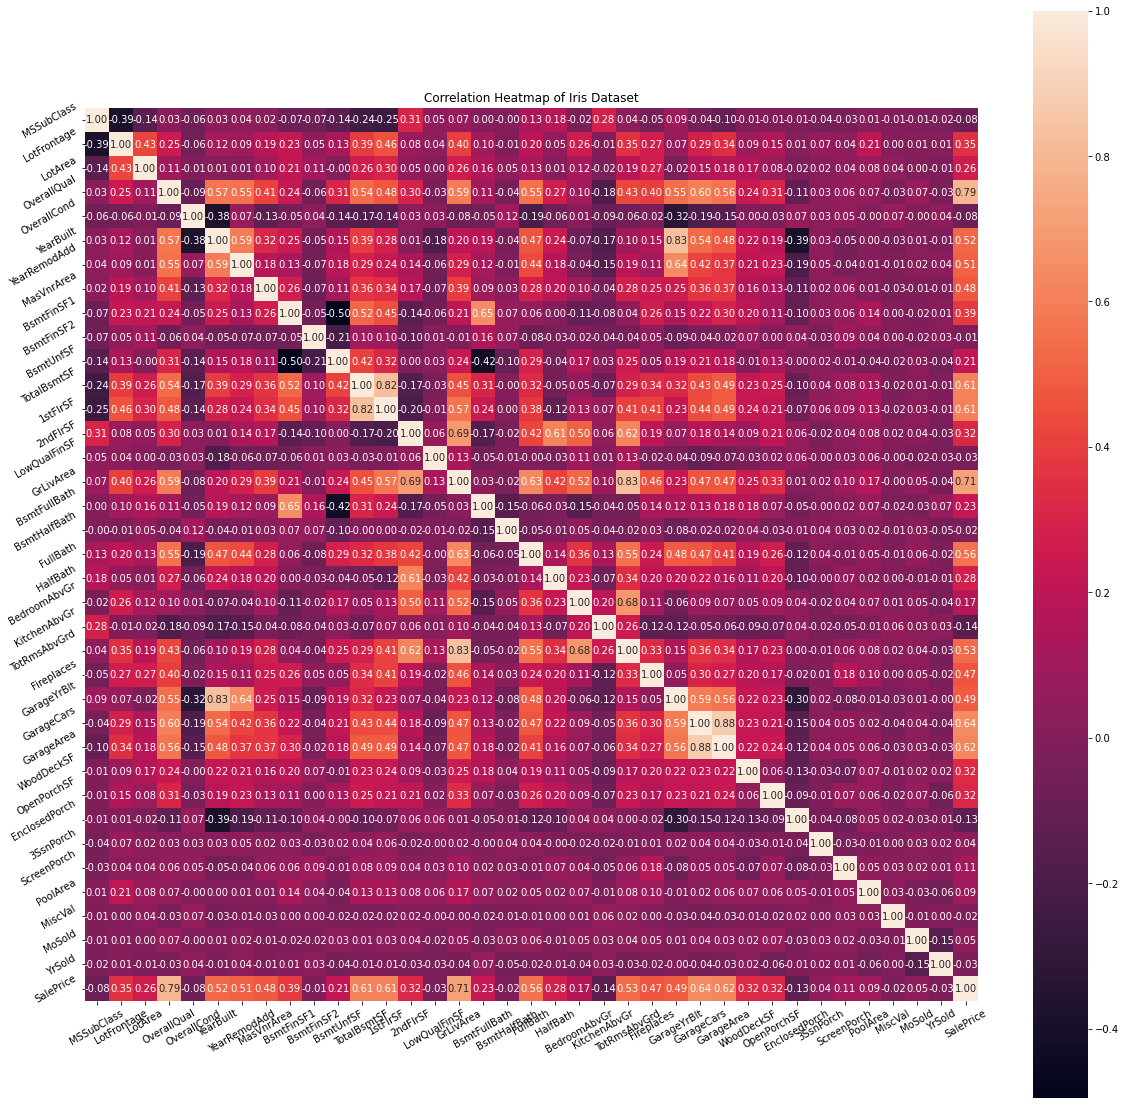

In [50]:
# Feature selection with correlation
corr_matrix = df.corr()
# Create correlation heatmap
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  


In [83]:
best_features = corr_matrix.loc[corr_matrix['SalePrice'] > 0.15]

# remove target feature
best_features = best_features.drop('SalePrice').drop(columns='SalePrice')
best_features.columns

<AxesSubplot:>

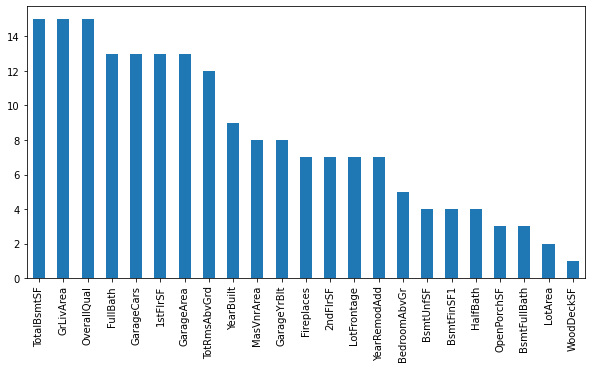

In [92]:
count_correlation = {}
for col in best_features.columns:
    corr_feat = best_features.loc[best_features[col] > 0.3].index
    for c in corr_feat:
        count_correlation[c] = count_correlation.get(c,0)+1

# posso prendere le prime k 
pd.Series(count_correlation).sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [94]:
len(df.select_dtypes(include='object').columns)

38

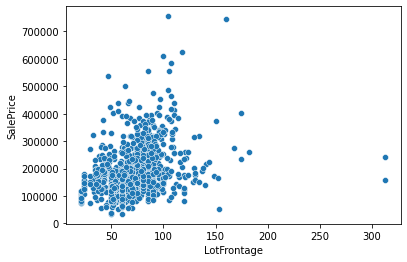

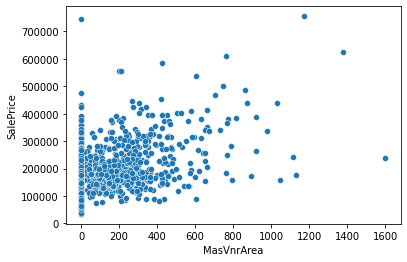

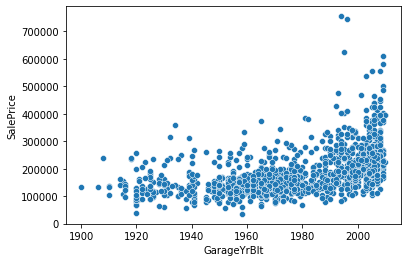

In [112]:
for col in df.select_dtypes(include='number'):
    if df[col].isna().sum() > 0:
        sns.scatterplot(data=df, x=col, y="SalePrice")
        plt.show()

<AxesSubplot:>

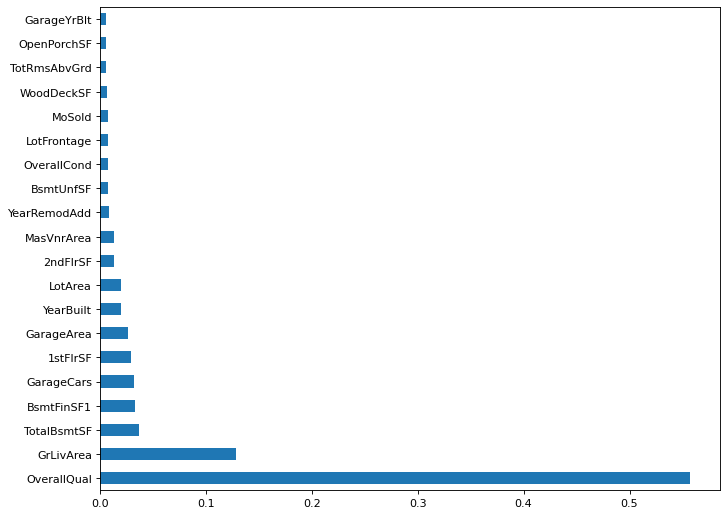

In [116]:
X = df.select_dtypes(include='number').drop(['SalePrice'], axis = 1)
y = df['SalePrice']

#fillnan values
X['GarageYrBlt'] = X['GarageYrBlt'].interpolate(method='polynomial', order=2)
X['MasVnrArea'] = X['MasVnrArea'].interpolate(method='polynomial', order=2)
X['LotFrontage'] = X['LotFrontage'].interpolate(method='polynomial', order=2)

# Normalize feature vector
X2 = StandardScaler().fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

# instantiate the classifier with n_estimators = 100
clf = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the regressor to the training set
clf.fit(X_train, y_train)

# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(clf.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')